In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# public-borough-attendance-results-2018-2022.xlsx

df=pd.read_excel("data/public-borough-attendance-results-2018-2022.xlsx")

In [4]:
df_all=pd.read_excel("data/public-borough-attendance-results-2018-2022.xlsx", "All Students")

# <center> **Chronic Absenteeism in NYC Schools**

#### <center> Geraldine Araujo

<center> <img src="Images/emptychairs.png" width=700 height=900 />

In [37]:
corr_df_all = df_all[['# Total Days', '# Days Absent', '# Days Present', '% Attendance', '# Chronically Absent', '% Chronically Absent']].corr(numeric_only = True).round(2)
corr_df_all

,# Total Days,# Days Absent,# Days Present,% Attendance,# Chronically Absent,% Chronically Absent
# Total Days,1.00,0.97,1.00,0.02,0.96,-0.03
# Days Absent,0.97,1.00,0.97,-0.11,0.99,0.08
# Days Present,1.00,0.97,1.00,0.03,0.96,-0.04
% Attendance,0.02,-0.11,0.03,1.00,-0.09,-0.88
# Chronically Absent,0.96,0.99,0.96,-0.09,1.00,0.08
% Chronically Absent,-0.03,0.08,-0.04,-0.88,0.08,1.00


### About this data
- From NYC OpenData
- Data set name: "`2017-18 - 2021-22` End-of-Year Borough Attendance and Chronic Absenteeism Data"
- School year: September - June
- COVID-19: 2019-20 attendance data was only available for September 2019 through March 13, 2020 due to shift in remote learning
- Attendance data 2020-21 school year: includes both in-person and remote instruction
- Chronically absent: < 90% attendance (absent > 10 % or more of total days)

### Importance of Attendance
- "[Chronic Absenteeism] has been linked to weaker academic performance and can predict whether a student is more likely to drop out before finishing high school." (New York Times, 2022)

- According to the NYC DOE, common reasons students miss school are:
    - Transportation problems
    - Health issues (including mental health)
    - School work
    - Bullying

## Correlation

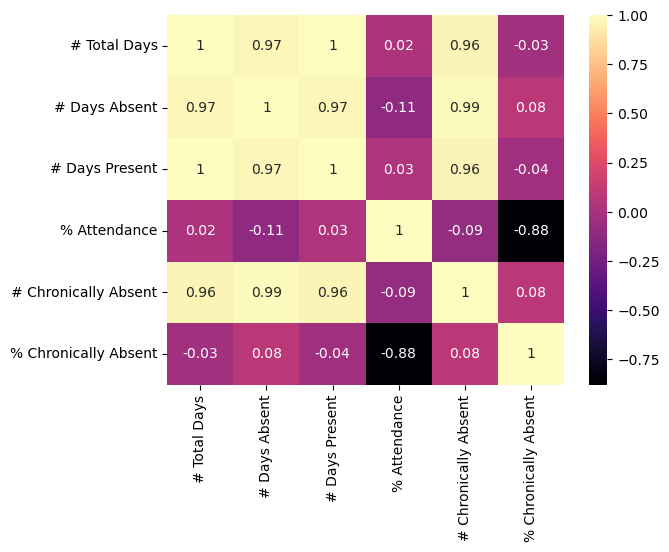

In [38]:
hm = sns.heatmap(corr_df_all, annot =True, cmap = 'magma')

- We see several strong correlations, except for those in purple, which may be likely due to the difference in units of measurement (namely numbers’s vs percentages’s)
- There is a strong negative correlation between % Chronically Absent and % Attendance
- The remainder of the variables have strong positive correlations
- As school days progress, most of the variables tend to increase
    - For example, see Total days & Days present
    - % of Chronically Absent, will be the variable we will focus on for the rest of the presentation. 

## Distribution of Data

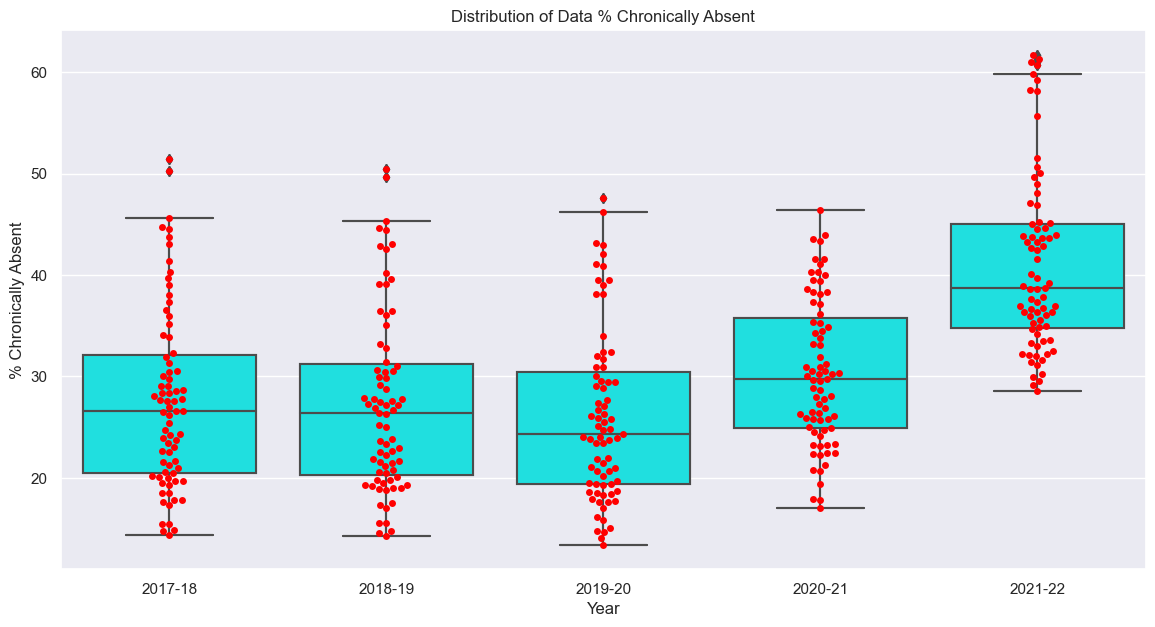

In [94]:
ax = sns.boxplot(x = 'Year', y = '% Chronically Absent', data = df_all).set(title = 'Distribution of Data % Chronically Absent')

sns.set(rc={'figure.figsize': (14, 7)})

ax = sns.boxplot(x = 'Year', y = '% Chronically Absent', data = df_all, color = 'cyan')
ax = sns.swarmplot(x = 'Year', y = '% Chronically Absent', data = df_all, color = 'red')

- How is the data for % of Chronically Absent distributed school-year to school-year?
- Each plot point represents a school
- Most plot points fall within the whiskers
    - In the first 3 years, there are a couple of outliers in these first 3 years near the 50% mark for the first 2 years and then lower in the 3rd
    - The median is well below the 30% mark in the first three years and we also see how the percentage of chronic absence was gradually decreasing
    - Percentage of chronic absenteeism goes up during and after the pandemic of 2020
    - Note: attendance data missing after March 13, 2020
- We do see the impact of the pandemic, as we see a jump of nearly 15% from the years before the pandemic to the most recent school year
- Focusing on the cluster of several school above the whisker in school-year 2021-22, those schools have chronic absenteeism of over 60%!

## <center> Poverty 
NYC DOE "Poverty" counts are based on the number of students with families who have qualified for free or reduced price lunch, or are eligible for Human Resources Administration (HRA) benefits.

In [5]:
df_poverty=pd.read_excel("data/public-borough-attendance-results-2018-2022.xlsx", "Poverty")

[Text(0.5, 1.0, 'Chronically Absent (%) per Year by Poverty Status')]

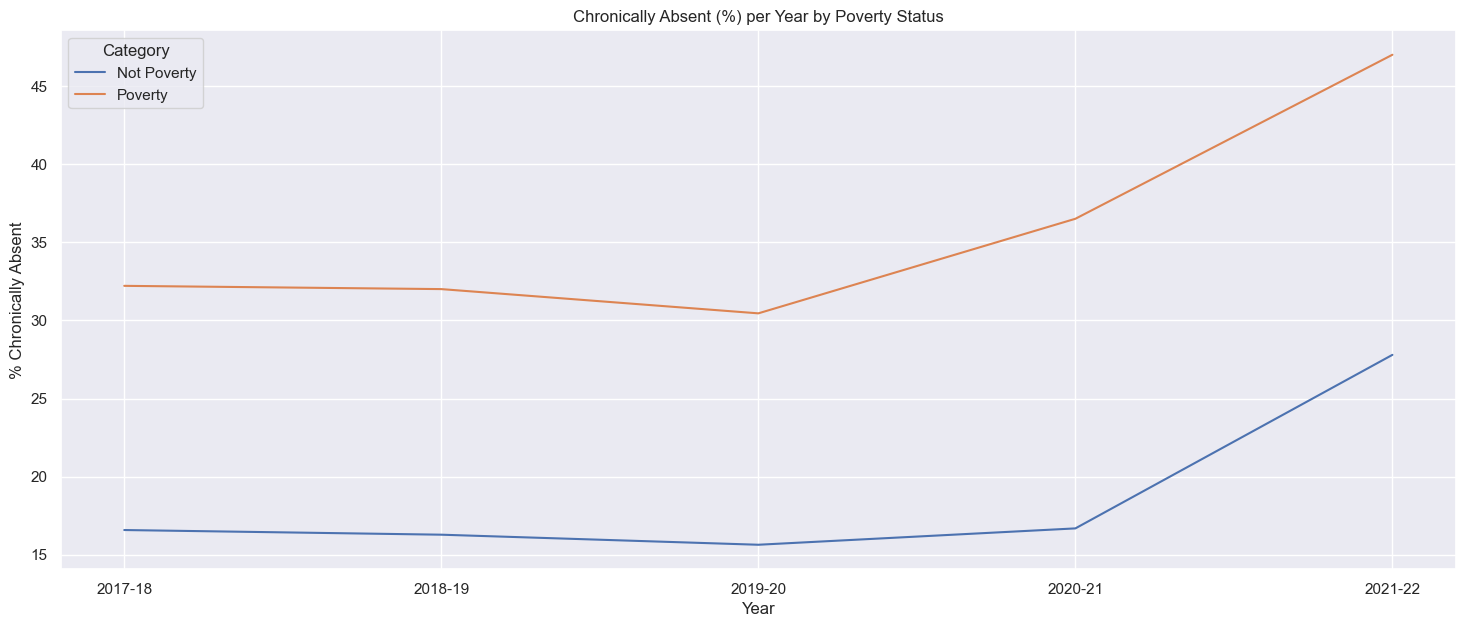

In [159]:
sns.set(rc={'figure.figsize': (18,7)})
sns.lineplot(data = df_poverty, x='Year', y= '% Chronically Absent', hue = 'Category', errorbar=None).set(title = 'Chronically Absent (%) per Year by Poverty Status')

- Students experiencing poverty have higher percentage of chronic absenteeism vs those who are not
- However, we do see that in the years of the pandemic, both numbers begin to rise
- ~10% rise for Not Poverty
- ~15% rise for Poverty
- Sharper increase for students already experiencing poverty

## <center> English Language Learner (ELL)

English language learner (ELL) data do not include Pre-K students.

[Text(0.5, 1.0, 'Chronically Absent (%) per Year by ELL Status')]

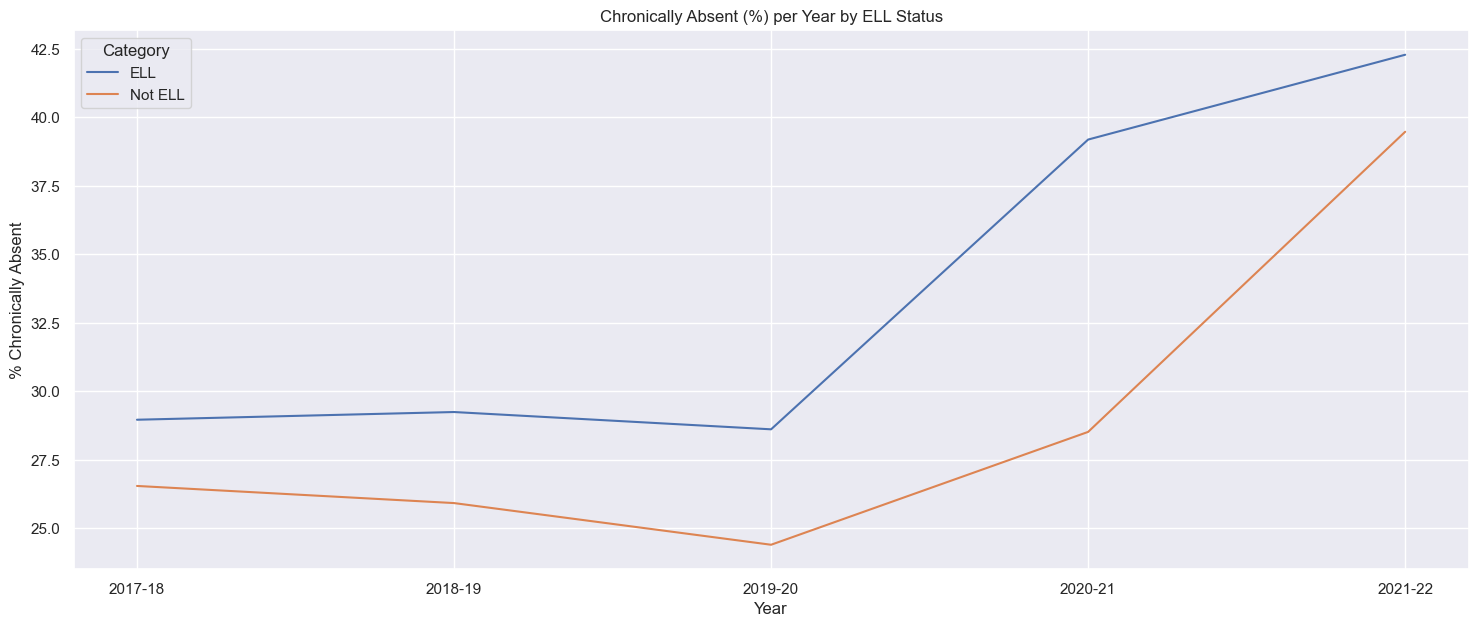

In [158]:
sns.lineplot(data = df_ELL, x='Year', y= '% Chronically Absent', hue = 'Category', errorbar=None).set(title = 'Chronically Absent (%) per Year by ELL Status')

- Note: this data does not include Pre-K because ELL assessment start in Kindergarten
- Both ELL and Not ELL numbers had similar trajectories prior to the pandemic
- Rise in chronic absenteeism starts after the pandemic
- There is a sharper rise for ELL students, but we do see it starts to level out after the 2020-21 school year while non-ELL students begin having a sharper increase
- Most news articles that focused on the pandemic’s impact on ELL students didn’t show an indication on why this might be
- At this trajectory, they may meet
    - Continuing to monitor this in the coming years
- The increase in chronic absenteeism is high for both considering where they started off (an ~ 10% increase)

## <center> Borough

[Text(0.5, 1.0, 'Chronically Absent (%) by Year')]

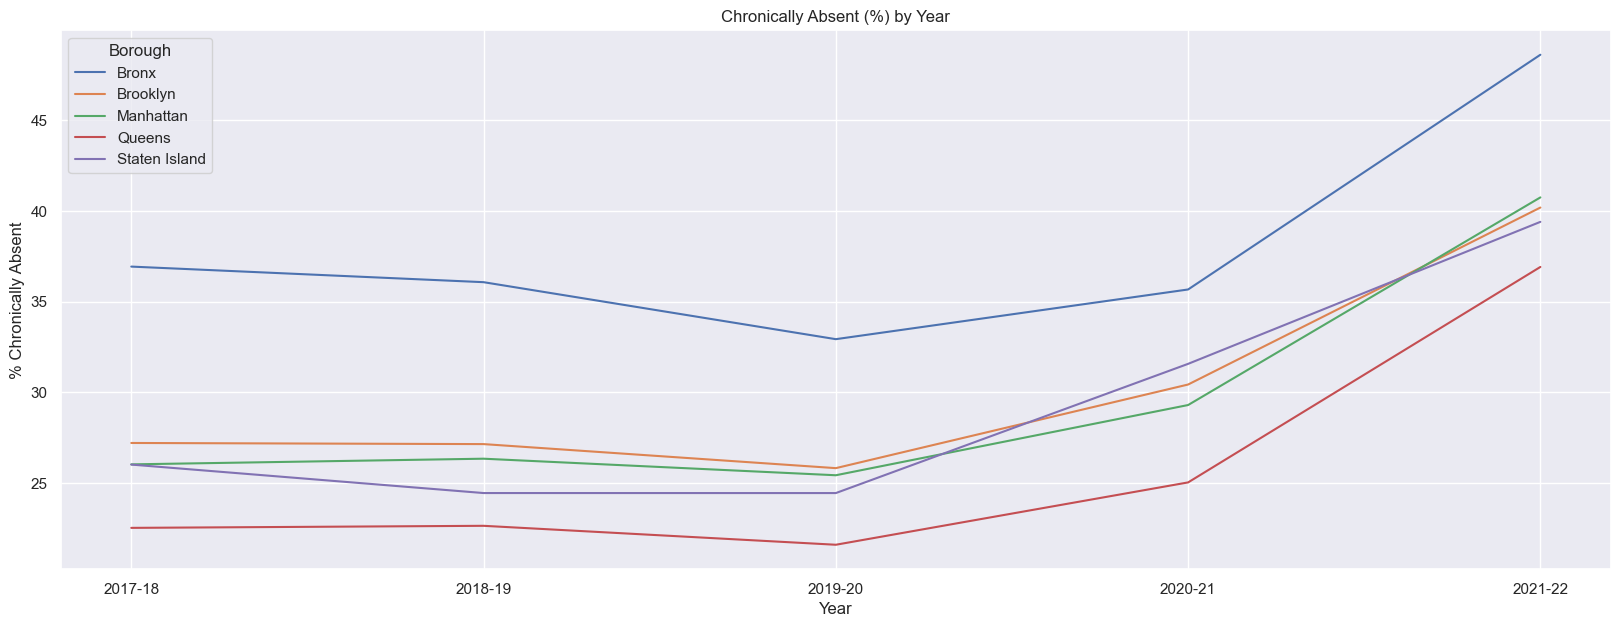

In [103]:
sns.lineplot(data = df_all, x='Year', y= '% Chronically Absent', hue = 'Borough', errorbar=None).set( title = 'Chronically Absent (%) by Year')

- Compared to the other boroughs, The Bronx is an outlier
    - The highest percentage of chronically absent students (even prior to the pandemic)
- Queens remains the lowest in number of chronically absent students
- Remainder of the boroughs have slight inconsistencies in their tragectories, yet remain relatively close
- Overall, all boroughs have a rise in chronically absenteeism after the pandemic

### The Bronx
Examining the outlier borough

##### By Poverty Status

[Text(0.5, 1.0, 'Chronically Absent (%) by Poverty Status in The Bronx')]

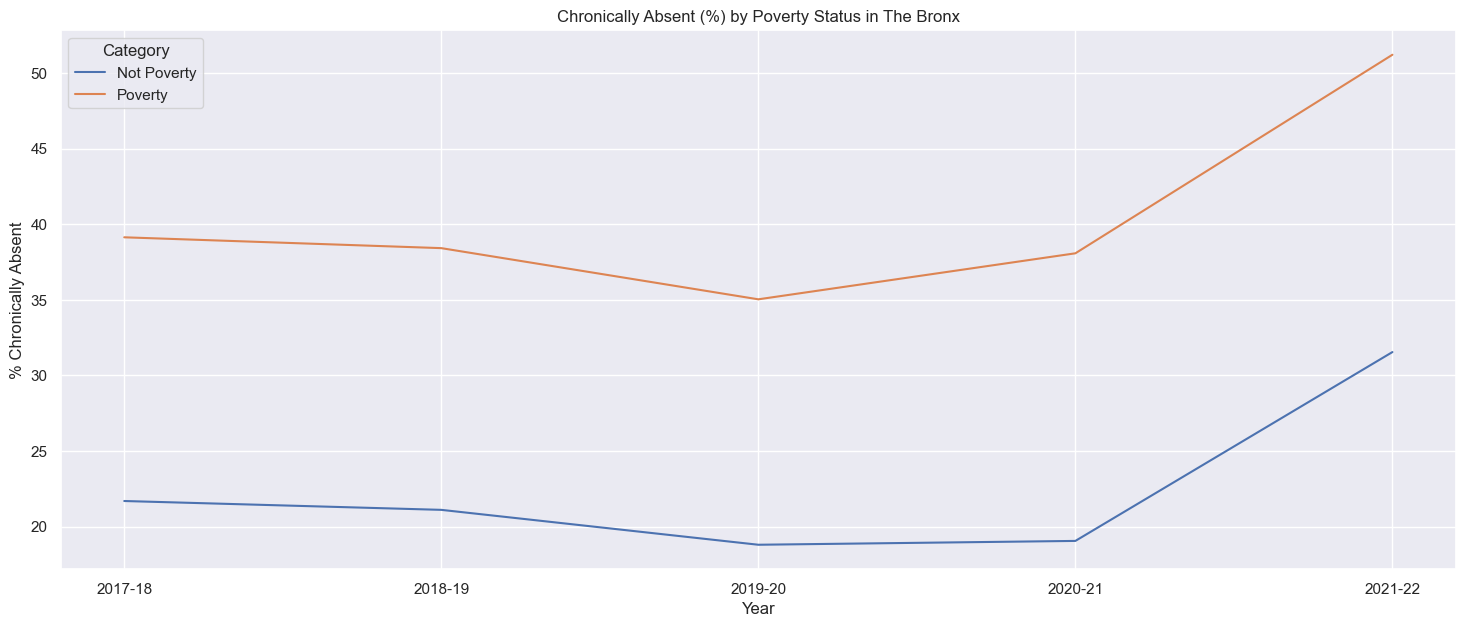

In [153]:
sns.lineplot(data = df_poverty[df_poverty['Borough'] == 'Bronx'], x='Year', y='% Chronically Absent', hue = 'Category', errorbar=None).set(title = 'Chronically Absent (%) by Poverty Status in The Bronx')

- Similar tragectory to those poverty status overall
- Even if students are not in poverty, students were more chronically absent after the pandemic
- Poverty could be contributing factor to The Bronx having such a high number of chronically absent students compared to the other boroughs

##### By ELL Status

[Text(0.5, 1.0, 'Chronically Absent (%) by ELL Status in The Bronx')]

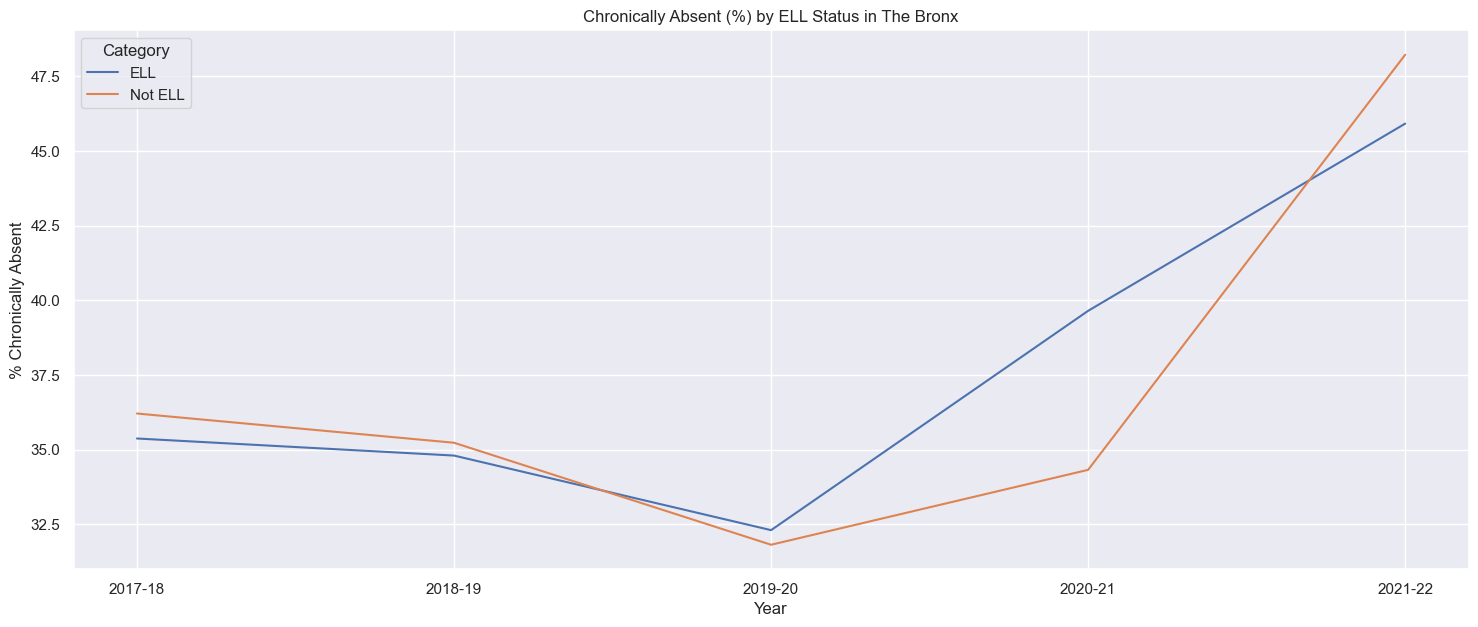

In [154]:
sns.lineplot(data = df_ELL[df_ELL['Borough'] == 'Bronx'], x='Year', y='% Chronically Absent', hue = 'Category', errorbar=None).set(title = 'Chronically Absent (%) by ELL Status in The Bronx')

- The trajectories are unpredictable
- Does not match ELL data for students overall in the city
- In 2017-18 and 2018-19, non-ELL have higher chronic absenteeism
- This switches when the pandemic hits
- In the most recent year, non-ELL have higher chronic absenteeism
- There is a 10-15% increase, which is alarming

In [6]:
df_ELL=pd.read_excel("data/public-borough-attendance-results-2018-2022.xlsx", "ELL")

##### By Ethnicity

[Text(0.5, 1.0, 'Chronically Absent (%) by Ethnicity in The Bronx')]

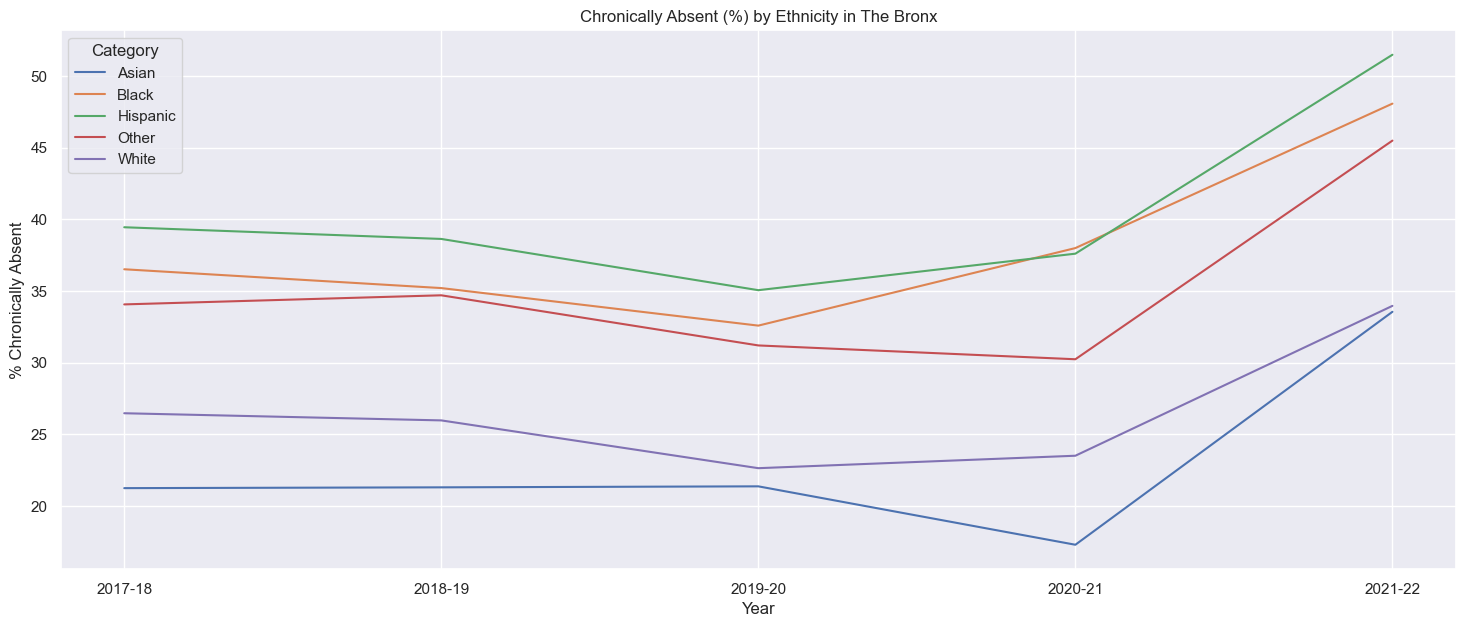

In [152]:
sns.lineplot(data = df_ethnicity[df_ethnicity['Borough'] == 'Bronx'], x='Year', y='% Chronically Absent', hue = 'Category', errorbar=None).set(title = 'Chronically Absent (%) by Ethnicity in The Bronx')

- White and Asian students have the lowest numbers in chronic absenteeism
- Black and Hispanic have the highest
    - Black and Hispanic students' absenteeism have similar numbers in 2020-21
- All students overall have an increase after the pandemic 

## <center> Ethnicity: Black and Hispanic Students

In [155]:
df_ethnicity=pd.read_excel("data/public-borough-attendance-results-2018-2022.xlsx", "Ethnicity")

#### Taking a closer look at Black and Hispanic Students in all Boroughs

##### Black students per borough

[Text(0.5, 1.0, 'Chronically Absent (%) Black Students per Borough')]

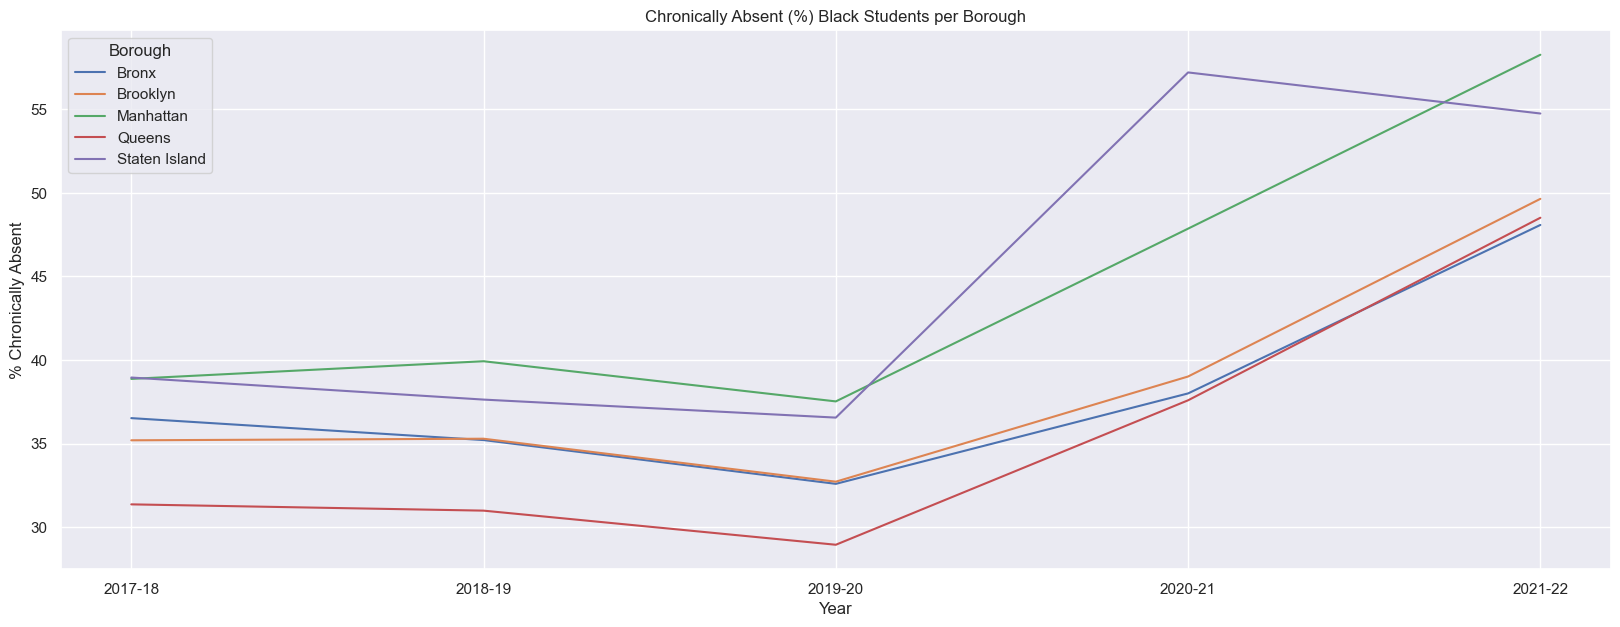

In [127]:
sns.lineplot(data = df_ethnicity[df_ethnicity['Category'] == 'Black'], x='Year', y='% Chronically Absent', hue = 'Borough', errorbar=None).set(title = 'Chronically Absent (%) Black Students per Borough')

- The highest borough with chronic absenteeism were Staten Island and Manhattan for Black students
- Staten Island had a spike in 2020-21
- Manhattan has the highest chronic absenteeism for Black Students in the most recent year (2021-22)

##### Hispanic students per borough

[Text(0.5, 1.0, 'Chronically Absent (%) Hispanic Students per Borough')]

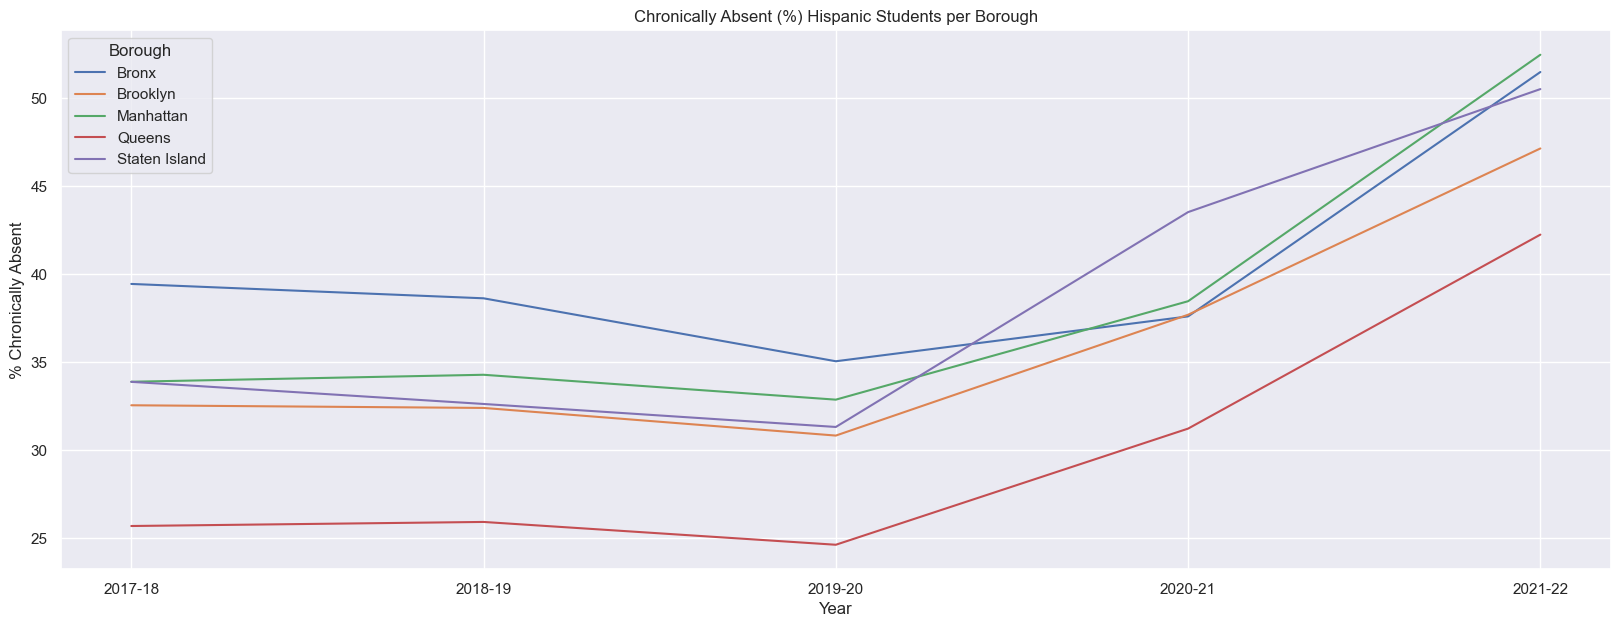

In [131]:
sns.lineplot(data = df_ethnicity[df_ethnicity['Category'] == 'Hispanic'], x='Year', y='% Chronically Absent', hue = 'Borough', errorbar=None).set(title = 'Chronically Absent (%) Hispanic Students per Borough')

- In 2017-18, The Bronx has the highest chronically absent Hispanic students
- In 2021-22, Manhattan has the highest
- Staten Island’s trajectory has similar numbers from Black students, where there is a higher increase in 2020-21
- Over all increase in all boroughs after the pandemic

### <center>Grade Level 

[Text(0.5, 1.0, 'Chronically Absent (%) by Grade per Year')]

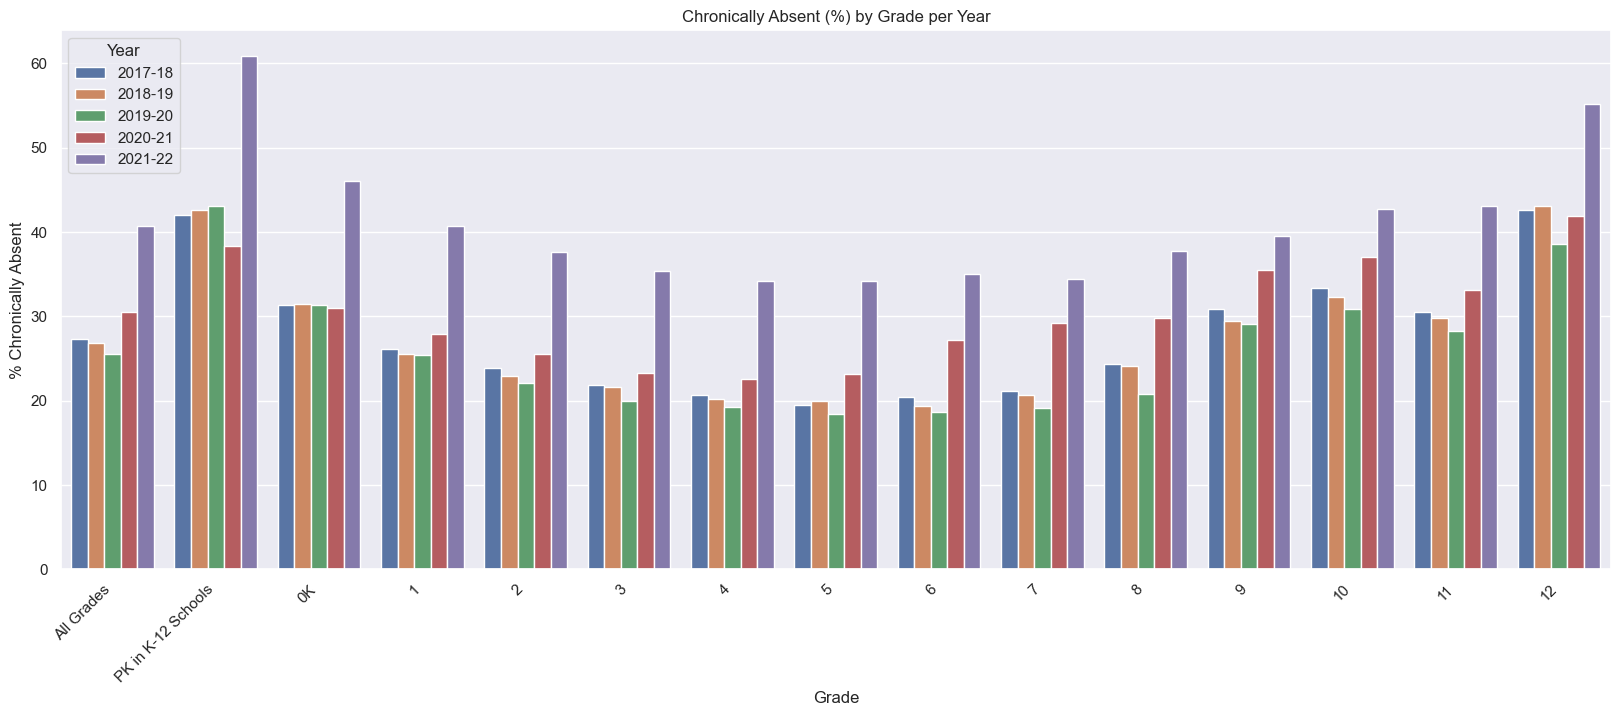

In [99]:
sns.set(rc={'figure.figsize': (20,7)})
plt.xticks(rotation = 45, ha = 'right')
sns.barplot(data = df_all, x='Grade', y= '% Chronically Absent', hue = 'Year', errorbar=None).set(title = 'Chronically Absent (%) by Grade per Year')

- Most students across all grades had an increase after the pandemic (red and purple bars)
- Pre-K (PK) seems to be only grade that had a decreased in 2020-21, but had the highest increase in the most recent year
- Highschool grades (9-12) overall had higher chronic absenteeism

#### Taking a closer look at Pre-K and 12th grades


In [7]:
PK = df_all[df_all["Grade"] == "PK in K-12 Schools"]

##### Pre-K per borough

[Text(0.5, 1.0, 'Chronically Absent (%) by Borough per Year - Grade Pre-K')]

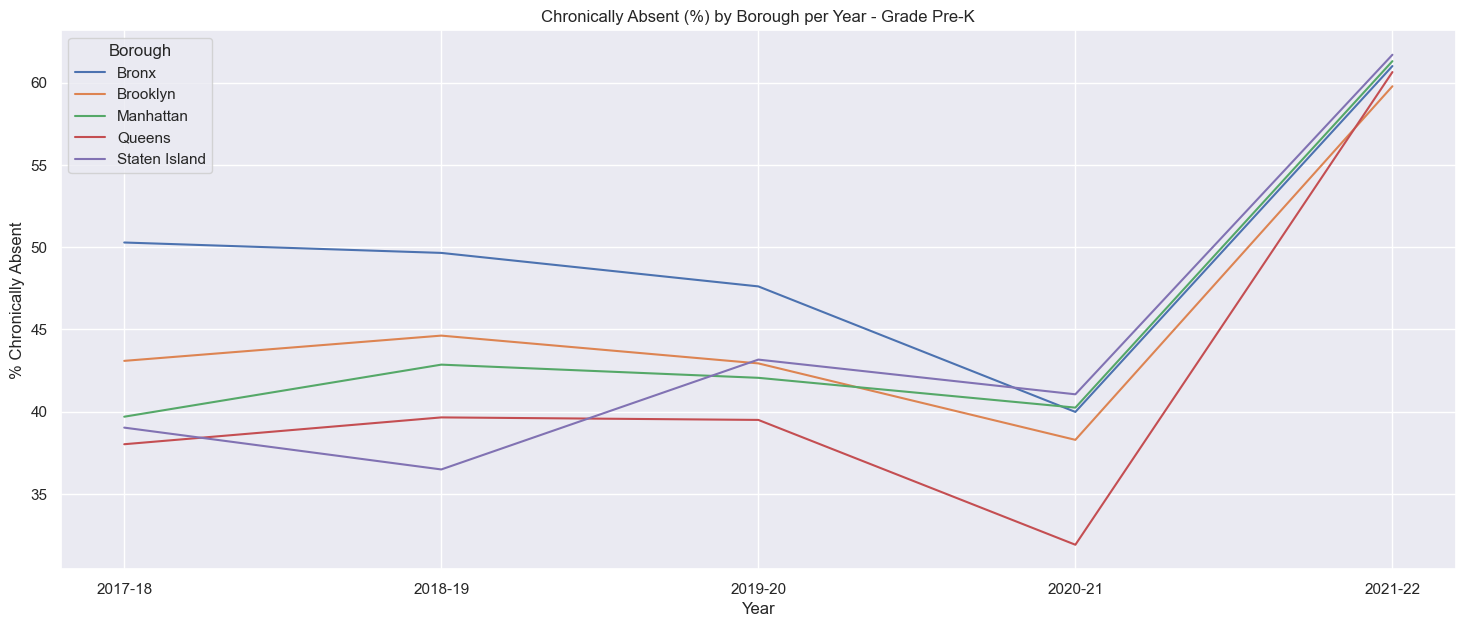

In [160]:
sns.lineplot(data = PK, x='Year', y= '% Chronically Absent', hue = 'Borough', errorbar=None).set(title = 'Chronically Absent (%) by Borough per Year - Grade Pre-K')

- Before the pandemic, PK students in The Bronx higher
- There is a decrease in all boroughs in 2020-21
    - Possible factors could be lower enrollment due to the pandemic, but would need to confirm with additional data
- Staten Island’s percentage increases to the point that it is the highest in 2021-22
- Overall for PK students, most borough are at or above the 60% mark in the most recent year

In [8]:
PK_grouped = PK.groupby(['Year','Borough'])['% Chronically Absent']

PK_grouped=pd.DataFrame(PK)

In [124]:
senior = df_all[df_all["Grade"] == 12]

##### 12th grade per borough

[Text(0.5, 1.0, 'Chronically Absent (%) by Borough per Year - Grade 12')]

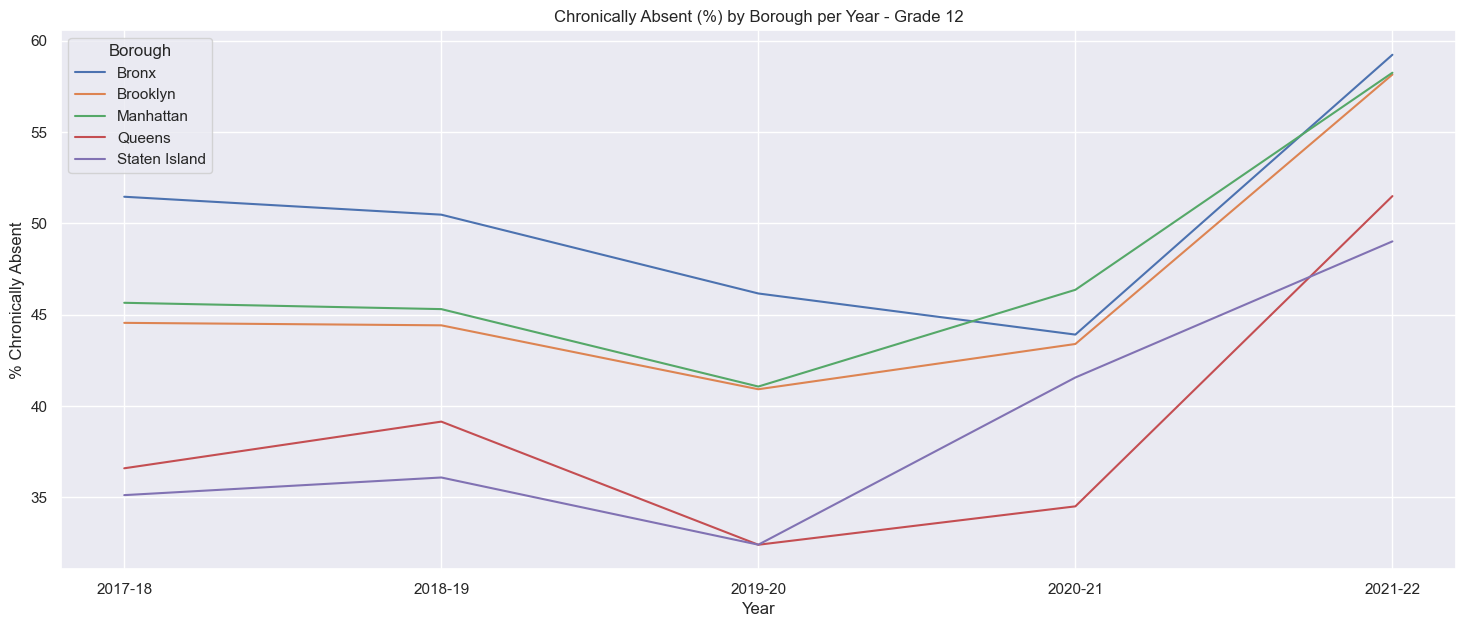

In [161]:
sns.lineplot(data = senior, x='Year', y= '% Chronically Absent', hue = 'Borough', errorbar=None).set(title = 'Chronically Absent (%) by Borough per Year - Grade 12')

- The Bronx has highest rate of chronic absenteeism in 2017-18, then decreases in 2020-21 
- Staten Island has a sharp increase in 2020-21 and into 2021-22
- The Bronx has the highest percentage of chronic absenteeism in 2021-22

### <center> Conclusion

- Increase in chronic absenteeims after COVID-19, which we have not recovered from
- Students already disadvantaged pre-pandemic were further disadvantaged post-pandemic
    - This particularly includes students under the Poverty status, Black and Hispanic students, and students overall in The Bronx
    - Students under this category began with higher numbers and continued having high number post-pandemic
    - ELL overall also falls under this category, except when in The Bronx
- The Bronx had highest percentage of chronically absent students overall
- Pre-K and 12th Grade had higher percentages of chronically absent students
- While Staten Island performed okay overall, there is a subset of students (Black, Hispanic, and PK) which may need more support to help decrease chronic absenteeism
- This data can help direct resources and attention where it is needed. 
- Consider alternatives for students that cannot attend 
    - Consider ways to address the common reasons students miss schoo
    - Providing alternative (remote learning if feeling unsafe/other learning modes)